<a href="https://colab.research.google.com/github/Janies-Garcia-Velasco/simulacion-n-2/blob/main/comparacion%20de%20monte%20carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# Función a integrar
def f(x):
    return np.cos(np.pi * x / 2)

In [13]:
# Método de Aceptación y Rechazo
def monte_carlo_aceptacion_rechazo(num_puntos):
    puntos = 0
    for _ in range(num_puntos):
        x_rand = np.random.rand()  # x entre [0, 1]
        y_rand = np.random.rand()  # y entre [0, 1] (máximo valor de cos(pi*x/2) es 1)

        if y_rand <= f(x_rand):
            puntos += 1

    area_estim = puntos / num_puntos  # El área total es 1, por lo que esto da la integral
    return area_estim

In [14]:

# Método de Muestreo Crudo
def monte_carlo_crudo(num_puntos):
    x_vals = np.random.rand(num_puntos)
    f_vals = f(x_vals)
    return np.mean(f_vals)

In [15]:
# Método de Muestreo por Importancia
def monte_carlo_importancia(num_puntos):
    # Usamos una distribución diferente, por ejemplo: g(x) = 2x
    def g(x):
        return 2 * x

    def w(x):
        return f(x) / g(x)

    # Muestreamos según la inversa de la cdf de g(x), que es sqrt(x)
    x_vals = np.sqrt(np.random.rand(num_puntos))
    f_vals = f(x_vals) / g(x_vals)  # Ponderamos por la función de importancia
    return np.mean(f_vals)

In [16]:
# Función principal para ejecutar y comparar los métodos
def comparar_metodos(num_puntos):
    ar_resultado = monte_carlo_aceptacion_rechazo(num_puntos)
    crudo_resultado = monte_carlo_crudo(num_puntos)
    importancia_resultado = monte_carlo_importancia(num_puntos)

    # Valor exacto de la integral
    exacto = 2 / np.pi

    # Error relativo de cada método
    error_ar = np.abs((ar_resultado - exacto) / exacto) * 100
    error_crudo = np.abs((crudo_resultado - exacto) / exacto) * 100
    error_importancia = np.abs((importancia_resultado - exacto) / exacto) * 100

    # Crear tabla comparativa
    datos = {
        "Método": ["Aceptación y Rechazo", "Muestreo Crudo", "Muestreo por Importancia"],
        "Resultado Estimado": [ar_resultado, crudo_resultado, importancia_resultado],
        "Valor Exacto": [exacto, exacto, exacto],
        "Error Relativo (%)": [error_ar, error_crudo, error_importancia]
    }

    tabla_comparativa = pd.DataFrame(datos)

    # Mostrar la tabla
    print("\nTabla Comparativa:")
    print(tabla_comparativa)

    # Comparar los resultados visualmente
    labels = ['Aceptación y Rechazo', 'Muestreo Crudo', 'Muestreo por Importancia']
    resultados = [ar_resultado, crudo_resultado, importancia_resultado]

    plt.bar(labels, resultados, color=['blue', 'green', 'orange'])
    plt.axhline(y=exacto, color='red', linestyle='--', label=f"Valor exacto ({exacto:.5f})")
    plt.ylabel('Resultado estimado')
    plt.title(f'Comparación de Métodos de Monte Carlo ({num_puntos} puntos)')
    plt.legend()
    plt.show()


Tabla Comparativa:
                     Método  Resultado Estimado  Valor Exacto  \
0      Aceptación y Rechazo            0.632100       0.63662   
1            Muestreo Crudo            0.631639       0.63662   
2  Muestreo por Importancia            0.628038       0.63662   

   Error Relativo (%)  
0            0.709964  
1            0.782435  
2            1.347976  


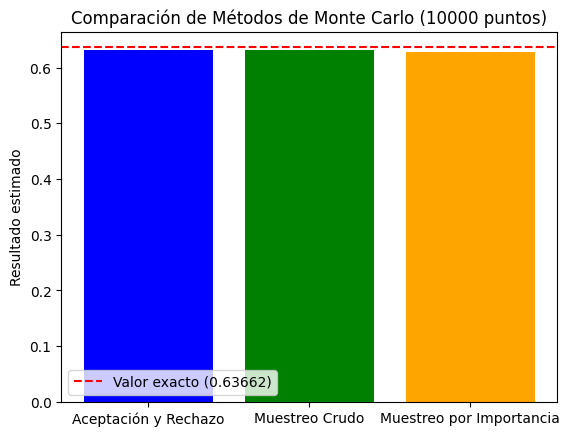

In [17]:
# Ejecución con un número de puntos
num_puntos = 10000
comparar_metodos(num_puntos)
